- デープラーニング
- ここでは多層パーセプトロン(multilayer perceptron: MLP)によるクラス分類と回帰について記載

In [2]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
from sklearn.model_selection import train_test_split
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 線形回帰を図示

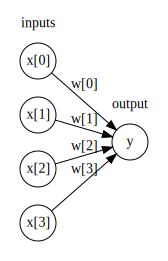

In [5]:
display(mglearn.plots.plot_logistic_regression_graph())

- 左側のノード軍は入力特徴量を表しす
- 接続している線が学習された係数を表す
- 右側のノードが出力を表す

### MLP(一層の隠れ層)を図示

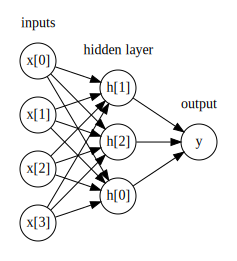

In [8]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- MLPは重み付き和の計算が繰り返し行われる
- まず中間処理ステップを表す隠れユニット(hidden units)の計算で重み付き和が行われ、次にこの隠れユニットの値について重み付き和が行われて最後の結果が出力される
- このモデルには学習しなければいけない係数が多くある。
    - 全ての入力ノードと全ての隠れユニットの間に1つずつ
    - 全てのの隠れ層ユニットと出力ノードの間にも一つずつ
- 個々の隠れユニットの重み付き和を計算したらその結果に対して非線形関数を適用する
    - 多くの場合relu(rectified liner unit: 正規化線形関数)やtanh(hyperbolic tangent: 双曲正接関数)が用いられる
    - reluは０以下の値を切り捨てる
    - tanhは小さい値に対しては-1に大きい値に対しては+1に飽和する

### 活性化関数tanh(双曲正接関数/ハイボリックタンジェント)とrelu(正規化線形関数)

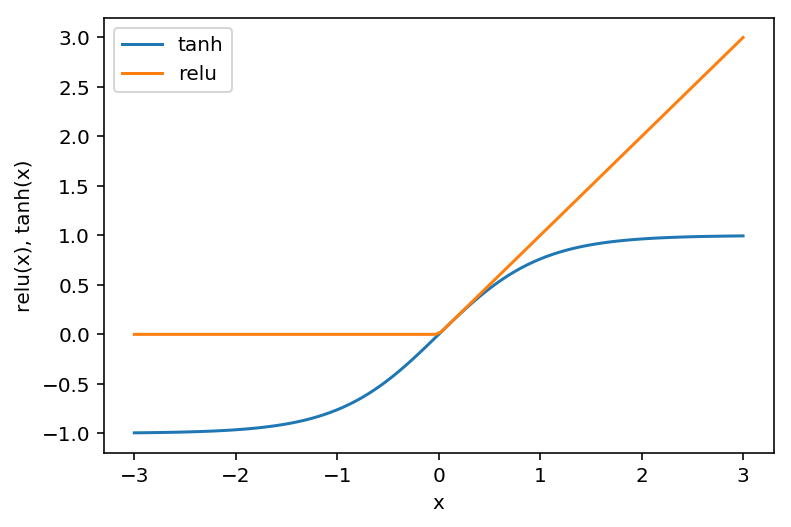

In [12]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

### MLP(2層の隠れ層)を図示

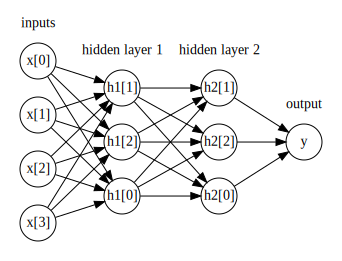

In [14]:
mglearn.plots.plot_two_hidden_layer_graph()

### MLPClassifierを使って動作検証
- two_moonsデータセット

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
from sklearn.datasets import make_moons

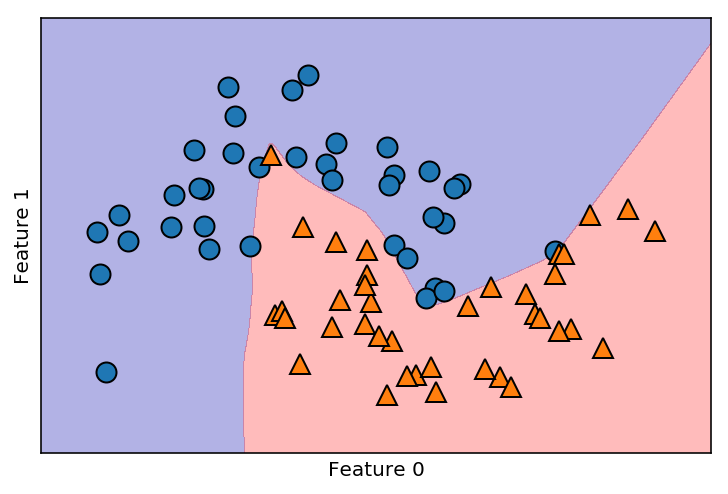

In [18]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

- 隠れ層に100ユニットを持つニューラルネットワークによる、two_moonsデータセットの決定境界

- ニューラルネットは全く線形ではないが、比較的なめらかな決定境界を学習している
- デフォルトでは、MLPは100隠れユニットを用いる
    - このデータセットに対しては明らかに大きすぎるため、モデルの複雑さを減らしても良い結果が得られる

#### 隠れ層を10ユニットに減らした結果

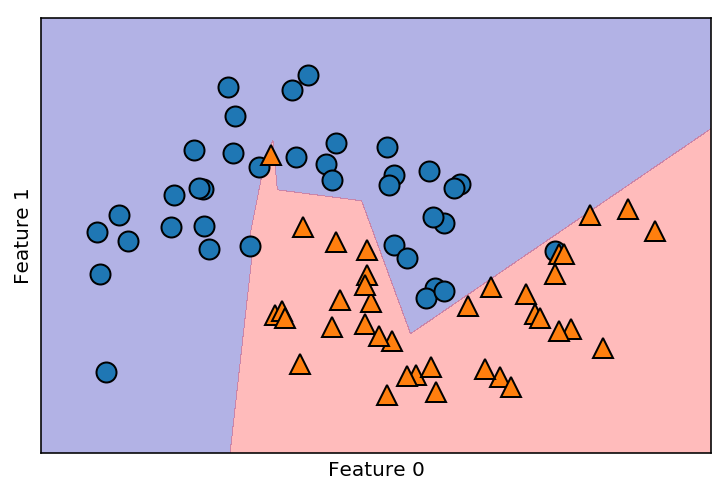

In [19]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

- 隠れ層を10にすると決定境界は少しギザギザになる
- デフォルトでは非線形化(活性化関数)にreluを用いる
- 決定境界をなめらかにするためには、
    - 隠れ層のユニット数を増やす
    - 隠れ層を増やす(深くする)
    - 非線形活性化関数にtanhを用いればよい

#### 隠れ層を2層つかう(10ユニット×2)

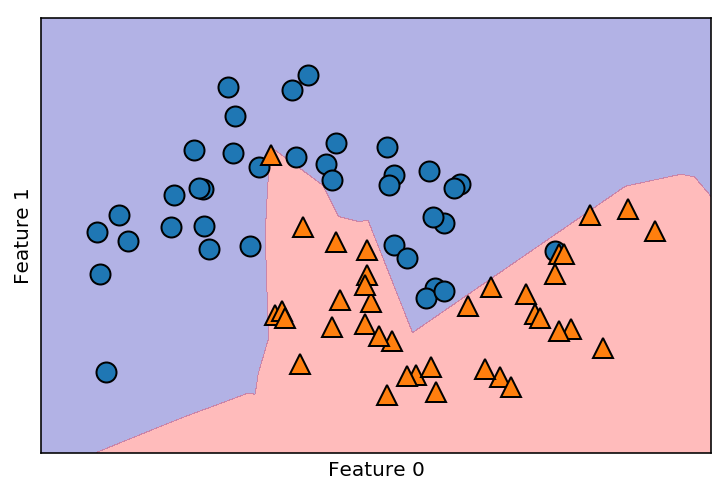

In [20]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

#### 隠れ層2層 + 非線形活性化関数にtanhを使う

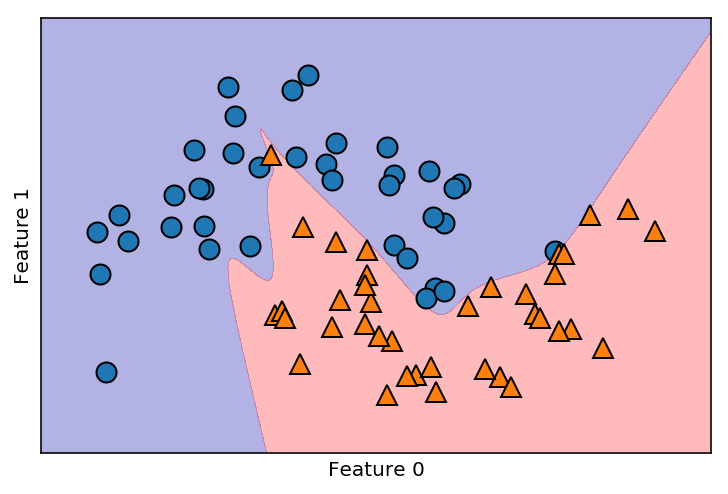

In [24]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

### 正則化パラメータ(alpha)
- ニューラルネットワークの複雑さをリッジ回帰や線形クラス分類機で行ったのと同様にl2ペナルティ(l2正則化)で重みを0に近づけることで制御できる
- MLPClassifierではこのパラメタは「alpha」でデフォルトは非常に小さい値(弱い正則化)に設定されている

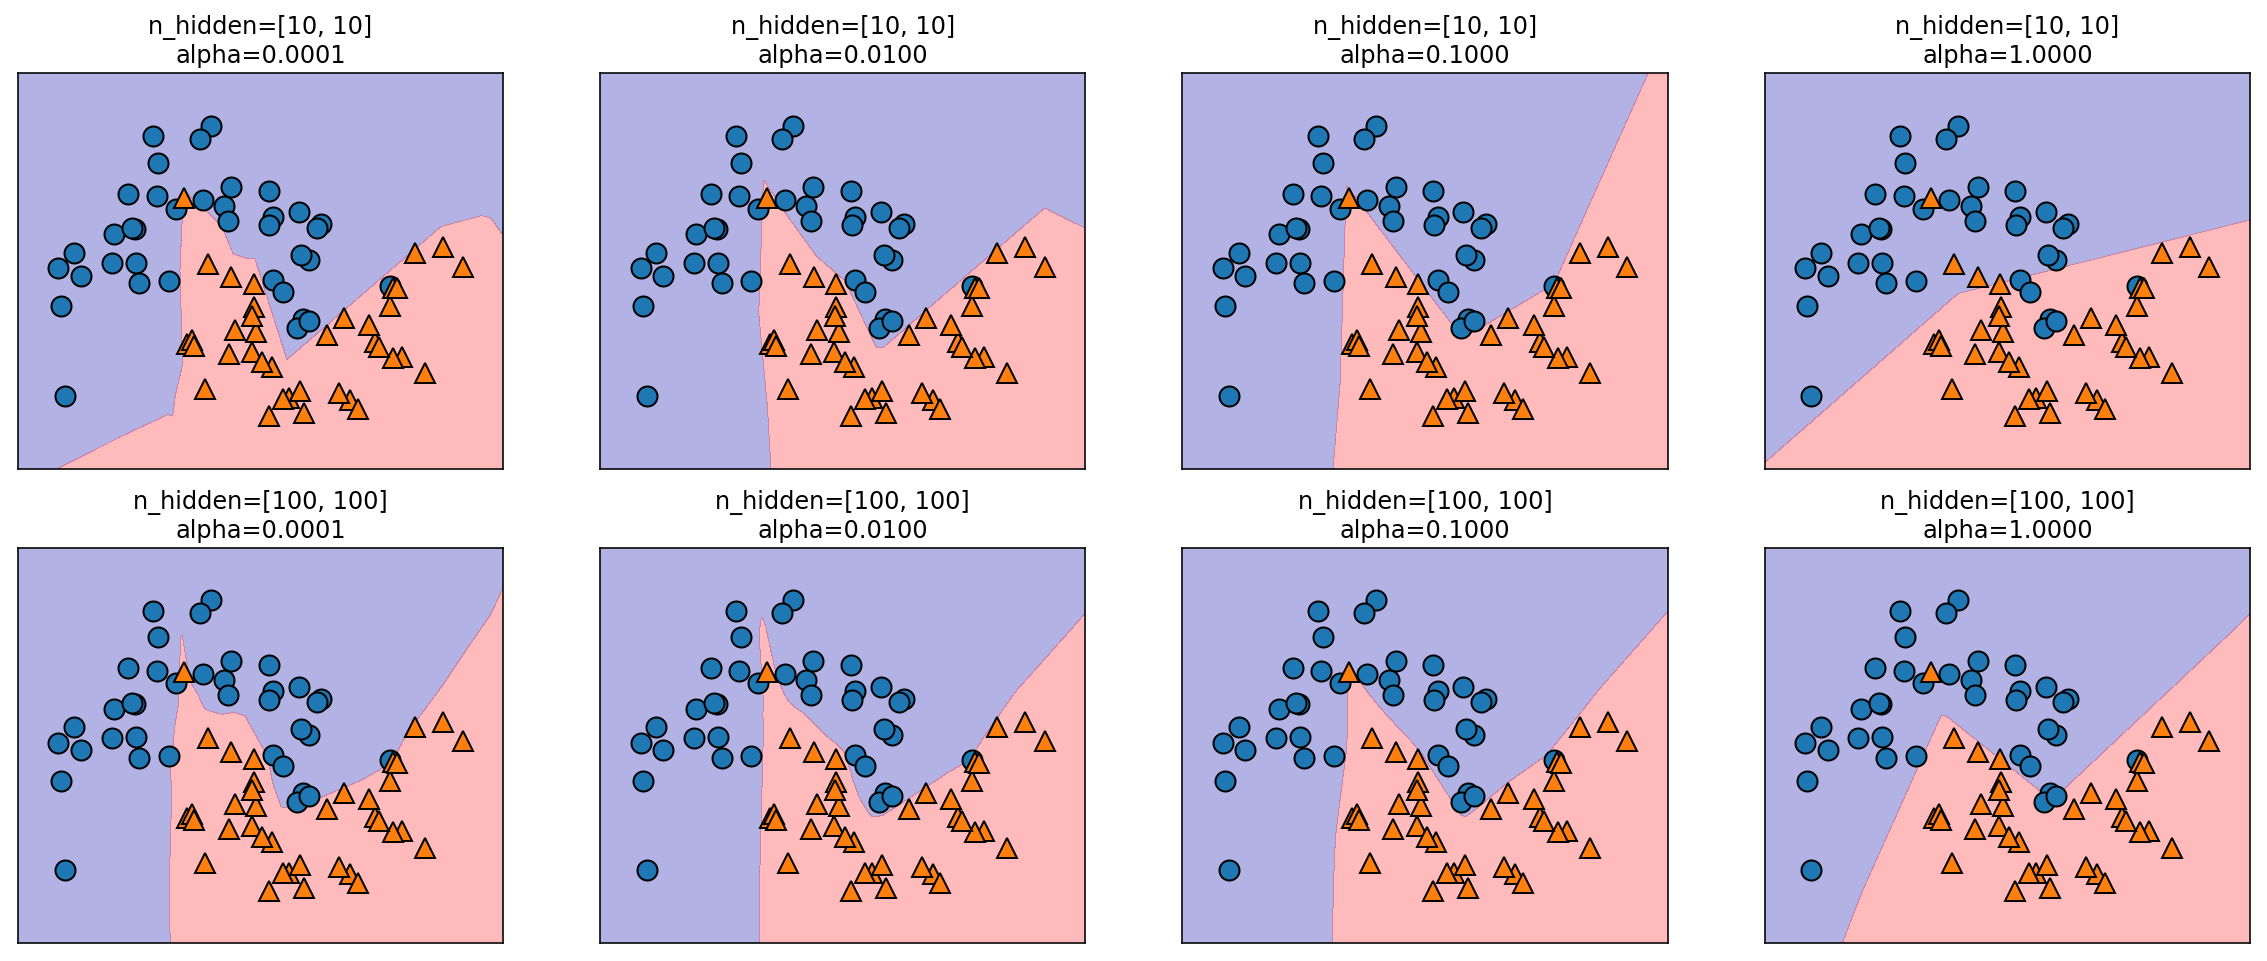

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, 
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], 
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],  y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}"
                     .format(n_hidden_nodes, n_hidden_nodes, alpha))

- alphaが大きくなるほど、モデルは汎用化されている
- ニューラルネットワークには複雑さを制御する方法が「隠れ層の数」、「隠れ層のユニット数」、「正則化(alpha)」など複数存在する